In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
data = pd.read_csv("./preparedData/ADAUSDT_twitter_sentiment.csv")
data.head()

,open_time,open,high,low,close,volume,close_time,tweet_count,polarity,subjectivity,neg,neu,pos,compound,text_len,text_word_count
0,2018-05-01 05:30:00,0.34145,0.34199,0.31870,0.32173,32463784.08,2018-05-01 09:29:59,1.0,0.0,0.0,0.000,0.881,0.119,0.3182,145.0,18.0
1,2018-05-01 09:30:00,0.32115,0.34300,0.32000,0.33787,14470581.61,2018-05-01 13:29:59,1.0,0.0,0.0,0.141,0.859,0.000,-0.5574,217.0,23.0
2,2018-05-01 13:30:00,0.33756,0.35900,0.33421,0.34093,25321414.19,2018-05-01 17:29:59,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,0.0,0.0
3,2018-05-01 17:30:00,0.34003,0.34290,0.33166,0.33735,16675168.68,2018-05-01 21:29:59,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,0.0,0.0
4,2018-05-01 21:30:00,0.33776,0.35950,0.33714,0.35374,18237446.69,2018-05-02 01:29:59,0.0,0.0,0.0,0.000,0.000,0.000,0.0000,0.0,0.0


In [3]:
rows = data.shape[0]

# Dividing the dataset into training and test data in the ratio (8:2)
# data train
data_train = data[:math.floor(rows*0.8)]

# data test
data_test = data[math.floor(rows*0.8):]

print(data_train.shape)
print(data_test.shape)

(6216, 16)
(1554, 16)


In [4]:
# extracting the dependent and independent variables from train and test data

X_train, Y_train = data_train[['volume', 'tweet_count', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
                                         'compound', 'text_len', 'text_word_count']], data_train['close']
X_test, Y_test = data_test[['volume', 'tweet_count', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
                             'compound', 'text_len', 'text_word_count']], data_test['close']

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((6216, 10), (1554, 10), (6216,), (1554,))

In [5]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1, 1)

In [6]:
# linear regression model is initialized and values are fitted.
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
# the coefficient of determination of the prediction.
print("The coefficient of determination (R-sqaure score) of the model is : ",
      model.score(X_train, Y_train))

print("Intercept of the model is : ", model.intercept_)
print("Co-efficients of the model are : ", model.coef_)

The coefficient of determination (R-sqaure score) of the model is :  0.4223585788332277
Intercept of the model is :  [0.06036898]
Co-efficients of the model are :  [[ 7.41320624e-10  3.47764226e+01 -9.52153353e-03 -1.33368207e-02
  -3.45290362e+01 -3.47003995e+01 -3.46309304e+01 -3.17042533e-03
  -4.71319377e-04  2.53593258e-03]]


In [8]:
# getting the outcomes from the model for the both test and train data
Y_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

In [10]:
# checking for r2_score, mean_squared_error, RMSE performance metrics
# for both test and train data

# for test dataSet
test_mse = mean_squared_error(Y_test, Y_pred)
test_r2 = r2_score(Y_test, Y_pred)
test_rmse = math.sqrt(mean_squared_error(Y_test, Y_pred))

# for train dataSet
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
train_rmse = math.sqrt(mean_squared_error(Y_train, Y_train_pred))

print("For TEST Data : ")
print("  Test mean squared error: ", round(test_mse, 3))
print("  Test R square value : ", round(test_r2, 3))
print("  RMSE for test data : ", round(test_rmse, 3))

print("\nFor TRAIN Data : ")
print("  Train mean squared error: ", round(train_mse, 3))
print("  Train R square value : ", round(train_r2, 3))
print("  RMSE for Train data : ", round(train_rmse, 3))


For TEST Data : 
  Test mean squared error:  1.969
  Test R square value :  -6.6
  RMSE for test data :  1.403

For TRAIN Data : 
  Train mean squared error:  0.014
  Train R square value :  0.422
  RMSE for Train data :  0.118


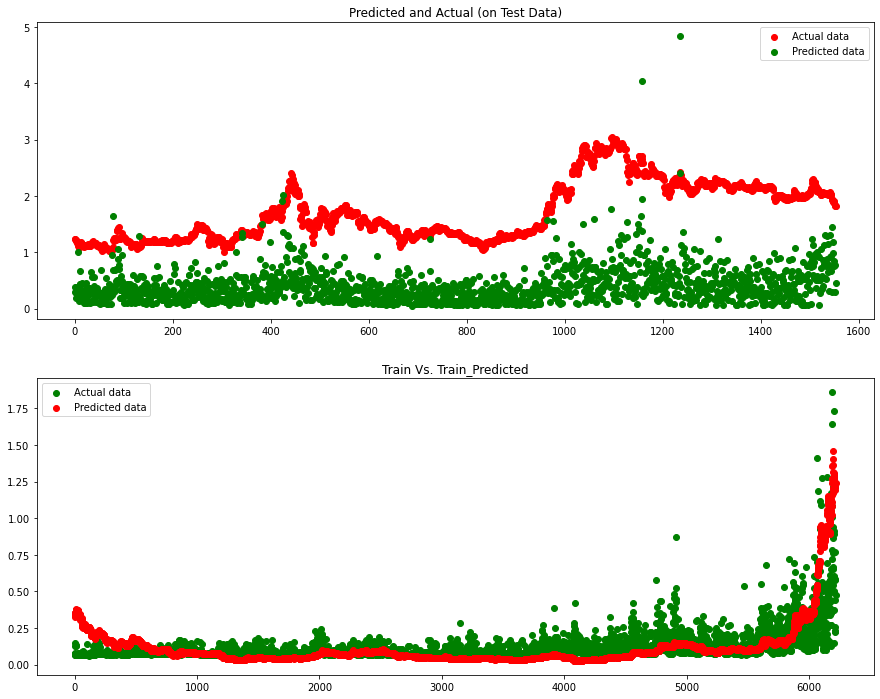

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

indices = [i for i in range(len(Y_pred))]
ax[0].scatter(indices, Y_test, color='red')
ax[0].scatter(indices, Y_pred, color='green')
ax[0].set_title("Predicted and Actual (on Test Data)")
ax[0].legend(['Actual data', 'Predicted data'])

indicies = [i for i in range(len(Y_train))]
ax[1].scatter(indicies, Y_train_pred, color='green')
ax[1].scatter(indicies, Y_train, color='red')
ax[1].set_title('Train Vs. Train_Predicted')
ax[1].legend(['Actual data', 'Predicted data'])

plt.show()